# Imputation
imputation is the process of replacing missing data with substituted values. When substituting for a data point, it is known as "unit imputation"; when substituting for a component of a data point, it is known as "item imputation". There are three main problems that missing data causes: missing data can introduce a substantial amount of bias, make the handling and analysis of the data more arduous, and create reductions in efficiency.

At starting stage i applied normal filling with mean,median,mode but after gaining some knowledge about accuracy i stared applying KNN imputation.accuracy was increased.

So i will demonistate all imputation methods and at last we will do practical and measure accuracy.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms
from sklearn.preprocessing import Imputer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import knn_impute as knn
#from fancyimpute import KNN
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Method 1


Use mean or mode or median to fill data and no need of import sklearn package this basic method to fill.



train['Age'].fillna(train['Age'].mode()[0], inplace=True)

## Method 2

If the missing value isn’t identified as NaN , then we have to first convert or replace such non NaN entry with a NaN.

data_name[‘column_name’].replace(0, np.nan, inplace= True)

train['Age'].replace(value,np.nan,inplace=True)




## Method 3

This is the fastest and easiest step to handle missing values. However, it is not generally advised. This method reduces the quality of our model as it reduces sample size because it works by deleting all other observations where any of the variable is missing. The process can be done by:

data_name.dropna()

train=train.dropna(how='all')

It drops column which have NaN.

## Method 4


sklearn.preprocessing.Imputer need this package to impute


Imputation transformer for completing missing values.

#### missing_values  : integer or “NaN”, optional (default=”NaN”)

The placeholder for the missing values. All occurrences of missing_values will be imputed. For missing values encoded as np.nan, use the string value “NaN”.

#### strategy : string, optional (default=”mean”)

The imputation strategy.

If “mean”, then replace missing values using the mean along the axis.
If “median”, then replace missing values using the median along the axis.
If “most_frequent”, then replace missing using the most frequent value along the axis.
axis : integer, optional (default=0)

The axis along which to impute.

If axis=0, then impute along columns.
If axis=1, then impute along rows.
verbose : integer, optional (default=0)

Controls the verbosity of the imputer.

#### copy : boolean, optional (default=True)

If True, a copy of X will be created. If False, imputation will be done in-place whenever possible. Note that, in the following cases, a new copy will always be made, even if copy=False:

If X is not an array of floating values;
If X is sparse and missing_values=0;
If axis=0 and X is encoded as a CSR matrix;
If axis=1 and X is encoded as a CSC matrix.

#### Methods

fit(X[, y])	Fit the imputer on X.
</br>
fit_transform(X[, y])	Fit to data, then transform it.
get_params([deep])	Get parameters for this estimator.
set_params(**params)	Set the parameters of this estimator.
transform(X)	Impute all missing values in X.

### implementation

from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values="NaN", strategy='mean', axis=0)

X = imputer.fit_transform(X)


Use mean or median or mode for imputation

## Method 5

## KNN Imputation

### implementation

knn_impute.py have place at ur current working directory and import

import knn_impute as knn

age_backup=knn.knn_impute(target=train['Age'], attributes=train.drop(['Age'], 1),
                                    aggregation_method="median", k_neighbors=10, numeric_distance='euclidean',
                                    categorical_distance='hamming', missing_neighbors_threshold=0.8)
                                    
                                    
train['Age'] = age_backup

## Method 6

If the missing value isn’t identified as NaN , then we have to first convert or replace such non NaN entry with a NaN.

data_name[‘column_name’].replace(0, np.nan, inplace= True)
This will replace values of zero with NaN in the column named column_name of our data_name .

## Method 7

### PREDICTIVE MODEL FOR HANDLING MISSING DATA

This is by far one of the best and most efficient method for handling missing data. Depending on the class of data that is missing, one can either use a regression model or classification to predict missing data. This works by turning missing features to labels themselves and now using columns without missing values to predict columns with missing values

The process goes thus:

Call the variable where you have missing values as y.

Split data into sets with missing values and without missing values, name the missing set X_text and the one without missing values X_train and take y (variable or feature where there is missing values) off the second set, naming it y_train.

Use one of classification methods to predict y_pred.

Add it to X_test as your y_test column. Then combine sets together.

For a beginner or newbie in machine learning, this approach might seem more difficult. The only drawback to this approach is that if there is no correlation between attributes with missing data and other attributes in the data set, then the model will be bias for predicting missing values.

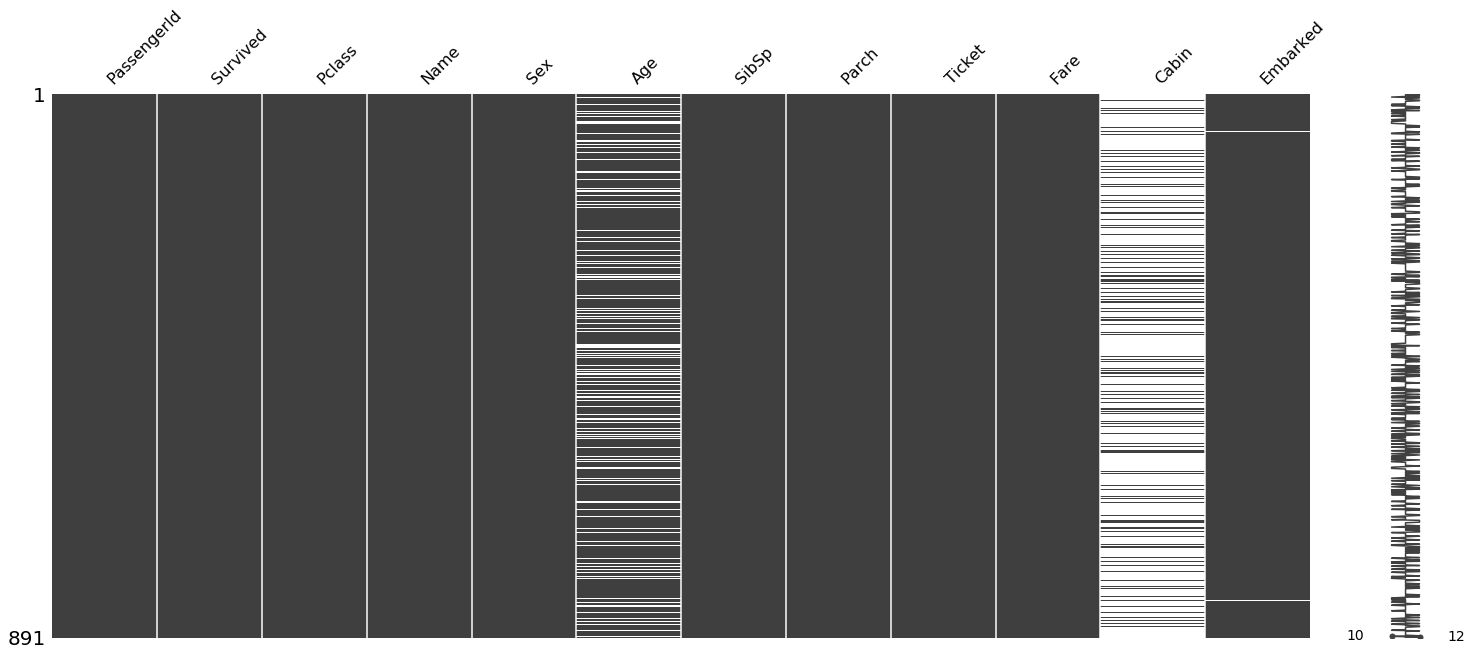

In [4]:
ms.matrix(train)

In [5]:
# Method 1 implementation

#############
train['Age'].fillna(train['Age'].mode()[0], inplace=True)
#############

gender = {'male': 1, 'female': 0}
train['Sex'] = train['Sex'].map(gender)

train=train.drop('Name',axis=1)
train=train.drop('Cabin',axis=1)
train=train.drop('Embarked',axis=1)
train=train.drop('Ticket',axis=1)

PassengerId=train['PassengerId']
train=train.drop('PassengerId',axis=1)

y = train["Survived"]
X = train.drop('Survived',1)


# Importing packages for cross validation and logistic regression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X, y)

# Predicting the Test set results
y_pred = classifier.predict(X)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(cm)
score = accuracy_score(y, y_pred)
print('accuracy_score',score)

[[478  71]
 [108 234]]
accuracy_score 0.7991021324354658


## Method 2 implementation

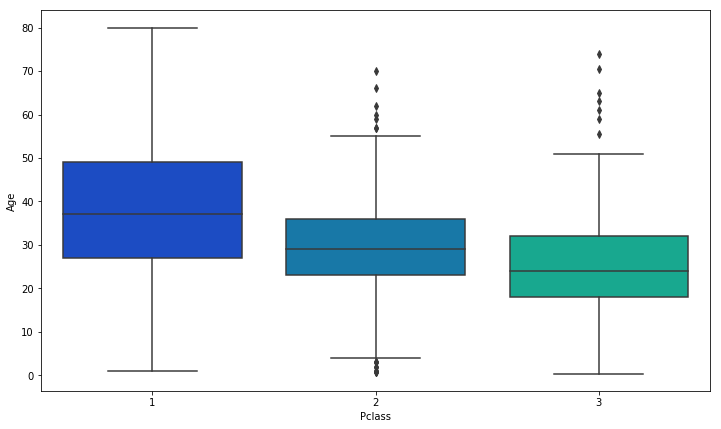

In [6]:
#### Method 2 implementation
train=pd.read_csv('train.csv')
#### Fill the missing values in the obtained data

plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')



The average age for each of the classes are estimated to be as follows:
  
  * For **Class 1** - The median age is 37
  * For **Class 2** - The median age is 29
  * For **Class 3** - The median age is 24
  
Let's impute these values into the age column.


In [7]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        # Class-1
        if Pclass == 1:
            return 37
        # Class-2 
        elif Pclass == 2:
            return 29
        # Class-3
        else:
            return 24

    else:
        return Age



#Applying the function.

train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [8]:

gender = {'male': 1, 'female': 0}
train['Sex'] = train['Sex'].map(gender)

train=train.drop('Name',axis=1)
train=train.drop('Cabin',axis=1)
train=train.drop('Embarked',axis=1)
train=train.drop('Ticket',axis=1)

PassengerId=train['PassengerId']
train=train.drop('PassengerId',axis=1)

y = train["Survived"]
X = train.drop('Survived',1)


# Importing packages for cross validation and logistic regression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X, y)

# Predicting the Test set results
y_pred = classifier.predict(X)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(cm)
score = accuracy_score(y, y_pred)
print('accuracy_score',score)

[[481  68]
 [108 234]]
accuracy_score 0.8024691358024691


## Method 3 try your self

## Method 4 implementation

In [9]:
#### Method 4 implementation
train=pd.read_csv('train.csv')
#### Fill the missing values in the obtained data

gender = {'male': 1, 'female': 0}
train['Sex'] = train['Sex'].map(gender)

train=train.drop('Name',axis=1)
train=train.drop('Cabin',axis=1)
train=train.drop('Embarked',axis=1)
train=train.drop('Ticket',axis=1)

PassengerId=train['PassengerId']
train=train.drop('PassengerId',axis=1)

y = train["Survived"]
X = train.drop('Survived',1)


############## implementation
imp = Imputer(missing_values="NaN", strategy='mean', axis=0)
X= imp.fit_transform(X)

##################################

# Importing packages for cross validation and logistic regression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X, y)

# Predicting the Test set results
y_pred = classifier.predict(X)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(cm)
score = accuracy_score(y, y_pred)
print('accuracy_score',score)

[[478  71]
 [108 234]]
accuracy_score 0.7991021324354658


## Method 5 implementation

In [10]:
#### Method 5 implementation
train=pd.read_csv('train.csv')
#### Fill the missing values in the obtained data

gender = {'male': 1, 'female': 0}
train['Sex'] = train['Sex'].map(gender)


####################################implementation####################################
age_backup=knn.knn_impute(target=train['Age'], attributes=train.drop(['Age', 'PassengerId'], 1),
                                    aggregation_method="median", k_neighbors=10, numeric_distance='euclidean',
                                    categorical_distance='hamming', missing_neighbors_threshold=0.8)


train['Age']=age_backup

#####################################################################################
train=train.drop('Name',axis=1)
train=train.drop('Cabin',axis=1)
train=train.drop('Embarked',axis=1)
train=train.drop('Ticket',axis=1)

PassengerId=train['PassengerId']
train=train.drop('PassengerId',axis=1)

y = train["Survived"]
X = train.drop('Survived',1)


############## implementation is done but 3 values are not filled so filling those with method 1####################
train['Age'].fillna(train['Age'].mode()[0], inplace=True)
##################################

# Importing packages for cross validation and logistic regression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X, y)

# Predicting the Test set results
y_pred = classifier.predict(X)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(cm)
score = accuracy_score(y, y_pred)
print('accuracy_score',score)

[[480  69]
 [106 236]]
accuracy_score 0.8035914702581369


## Now will apply for Decision Tree Classification 

In [26]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X, y)

# Predicting the Test set results
y_pred = classifier.predict(X)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(cm)
score = accuracy_score(y, y_pred)
print('accuracy_score',score)

[[549   0]
 [  1 341]]
accuracy_score 0.9988776655443322


In [12]:
#### Method 6 implementation
train=pd.read_csv('train.csv')
#### Fill the missing values in the obtained data

gender = {'male': 1, 'female': 0}
train['Sex'] = train['Sex'].map(gender)

############## implementation
train = train.fillna(0)
##################################

train=train.drop('Name',axis=1)
train=train.drop('Cabin',axis=1)
train=train.drop('Embarked',axis=1)
train=train.drop('Ticket',axis=1)

PassengerId=train['PassengerId']
train=train.drop('PassengerId',axis=1)

y = train["Survived"]
X = train.drop('Survived',1)



# Importing packages for cross validation and logistic regression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X, y)

# Predicting the Test set results
y_pred = classifier.predict(X)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(cm)
score = accuracy_score(y, y_pred)
print('accuracy_score',score)

[[474  75]
 [107 235]]
accuracy_score 0.7957351290684624


In [22]:
#### Method 7 implementation
train=pd.read_csv('train.csv')
#### Fill the missing values in the obtained data

gender = {'male': 1, 'female': 0}
train['Sex'] = train['Sex'].map(gender)

train=train.drop('Name',axis=1)
train=train.drop('Cabin',axis=1)
train=train.drop('Embarked',axis=1)
train=train.drop('Ticket',axis=1)

PassengerId=train['PassengerId']
train=train.drop('PassengerId',axis=1)

y = train["Age"]
X = train.drop('Age',1)

# Importing packages for DecisionTreeRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
import regression_models
classifier = DecisionTreeRegressor(random_state=0)
classifier.fit(X, y)

# Predicting the age
Age = classifier.predict(X)
#####################################################################################

train=pd.read_csv('train.csv')
#### Fill the missing values in the obtained data

gender = {'male': 1, 'female': 0}
train['Sex'] = train['Sex'].map(gender)

############## implementation
train["Age"] = Age
train["Age"].astype(int)
##################################

train=train.drop('Name',axis=1)
train=train.drop('Cabin',axis=1)
train=train.drop('Embarked',axis=1)
train=train.drop('Ticket',axis=1)

PassengerId=train['PassengerId']
train=train.drop('PassengerId',axis=1)

y = train["Survived"]
X = train.drop('Survived',1)

# Importing packages for cross validation and logistic regression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X, y)

# Predicting the Test set results
y_pred = classifier.predict(X)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(cm)
score = accuracy_score(y, y_pred)
print('accuracy_score',score)


[[474  75]
 [110 232]]
accuracy_score 0.792368125701459


# So apply imputation methods for better outcome.

# And I will add more imputation methods in future and if any one knows about new imputation methods please at comment at GITHUB




#                                            *** ALL THE BEST ***